# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
from scipy import stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

temp = []
humid = []
cloud = []
wind = []
cities2 = []
lat = []
lon = []

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

for city in cities:
    print (f'Index: {cities.index(city)}')
    print (f'Trying to get data for {city} \n')
    try:
        response = requests.get(query_url + city).json()
        cities2.append(response['name'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
    except:
           print(f'{city} pull failed \n')
    

Index: 0
Trying to get data for busselton 

Index: 1
Trying to get data for saint-joseph 

Index: 2
Trying to get data for balkanabat 

Index: 3
Trying to get data for punta arenas 

Index: 4
Trying to get data for barentsburg 

barentsburg pull failed 

Index: 5
Trying to get data for rikitea 

Index: 6
Trying to get data for mahadday weyne 

mahadday weyne pull failed 

Index: 7
Trying to get data for bonavista 

Index: 8
Trying to get data for shelburne 

Index: 9
Trying to get data for cayenne 

Index: 10
Trying to get data for puerto ayora 

Index: 11
Trying to get data for port elizabeth 

Index: 12
Trying to get data for tasiilaq 

Index: 13
Trying to get data for georgetown 

Index: 14
Trying to get data for kondinskoye 

Index: 15
Trying to get data for mar del plata 

Index: 16
Trying to get data for atuona 

Index: 17
Trying to get data for amahai 

Index: 18
Trying to get data for prince george 

Index: 19
Trying to get data for pevek 

Index: 20
Trying to get data for moos

Index: 172
Trying to get data for mogadishu 

Index: 173
Trying to get data for domoni 

Index: 174
Trying to get data for tiebissou 

Index: 175
Trying to get data for cherskiy 

Index: 176
Trying to get data for sinkat 

sinkat pull failed 

Index: 177
Trying to get data for lodwar 

Index: 178
Trying to get data for touros 

Index: 179
Trying to get data for komsomolskiy 

Index: 180
Trying to get data for estelle 

Index: 181
Trying to get data for marawi 

Index: 182
Trying to get data for whitehorse 

Index: 183
Trying to get data for luderitz 

Index: 184
Trying to get data for oussouye 

Index: 185
Trying to get data for sinnamary 

Index: 186
Trying to get data for vihti 

Index: 187
Trying to get data for oytal 

Index: 188
Trying to get data for warqla 

warqla pull failed 

Index: 189
Trying to get data for viligili 

viligili pull failed 

Index: 190
Trying to get data for qaqortoq 

Index: 191
Trying to get data for nanortalik 

Index: 192
Trying to get data for ust-nera 

Index: 344
Trying to get data for palmer 

Index: 345
Trying to get data for kulhudhuffushi 

Index: 346
Trying to get data for mocajuba 

Index: 347
Trying to get data for vila 

Index: 348
Trying to get data for golden 

Index: 349
Trying to get data for grand gaube 

Index: 350
Trying to get data for jaguarari 

Index: 351
Trying to get data for la libertad 

Index: 352
Trying to get data for killybegs 

Index: 353
Trying to get data for zhaotong 

Index: 354
Trying to get data for mangai 

Index: 355
Trying to get data for nizhneyansk 

nizhneyansk pull failed 

Index: 356
Trying to get data for kuala terengganu 

Index: 357
Trying to get data for linnich 

Index: 358
Trying to get data for dickinson 

Index: 359
Trying to get data for maceio 

Index: 360
Trying to get data for churapcha 

Index: 361
Trying to get data for rexburg 

Index: 362
Trying to get data for xining 

Index: 363
Trying to get data for mount darwin 

Index: 364
Trying to get data for bengkulu 

Index: 365
Try

Index: 518
Trying to get data for limbe 

Index: 519
Trying to get data for saleaula 

saleaula pull failed 

Index: 520
Trying to get data for herat 

Index: 521
Trying to get data for trairi 

Index: 522
Trying to get data for beringovskiy 

Index: 523
Trying to get data for ankang 

Index: 524
Trying to get data for odweyne 

Index: 525
Trying to get data for ndiekro 

ndiekro pull failed 

Index: 526
Trying to get data for hay river 

Index: 527
Trying to get data for copperas cove 

Index: 528
Trying to get data for padang 

Index: 529
Trying to get data for monchegorsk 

Index: 530
Trying to get data for goderich 

Index: 531
Trying to get data for nago 

Index: 532
Trying to get data for chagda 

chagda pull failed 

Index: 533
Trying to get data for braganca paulista 

Index: 534
Trying to get data for santa helena de goias 

Index: 535
Trying to get data for shingu 

Index: 536
Trying to get data for paradwip 

paradwip pull failed 

Index: 537
Trying to get data for hervey ba

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_df = pd.DataFrame({
    'City':cities2,
    'Temp (F)':temp,
    'Humidity':humid,
    'Cloudiness':cloud,
    'Wind Speed (MPH)':wind,
    'Latitude':lat,
    'Longitude':lon
})

city_df.to_csv(output_data_file)

city_df.head()

,City,Temp (F),Humidity,Cloudiness,Wind Speed (MPH),Latitude,Longitude
0,Busselton,92.25,9,4,5.68,-33.65,115.33
1,Saint-Joseph,78.80,54,0,23.04,-21.37,55.62
2,Balkanabat,26.92,80,0,0.96,39.51,54.37
3,Punta Arenas,44.29,81,0,5.82,-53.15,-70.92
4,Rikitea,77.22,79,60,14.23,-23.12,-134.97


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
clean_df = city_df.loc[city_df['Humidity'] <= 100]

In [6]:
print (clean_df['Humidity'].max())

100


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

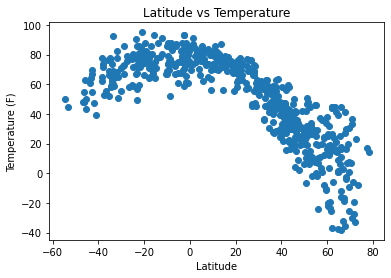

In [8]:
latitude = list(clean_df['Latitude'])
temperature = list(clean_df['Temp (F)'])

latvtemp = plt.scatter(latitude,temperature)
latvtemp = plt.title("Latitude vs Temperature")
latvtemp = plt.xlabel("Latitude")
latvtemp = plt.ylabel("Temperature (F)")
plt.savefig('latitude_vs_temp.png')

#This graph is comparing the temperature to the latitude of the Earth. Seems like the temperature gets higher near 0, 
#lower away from 0

## Latitude vs. Humidity Plot

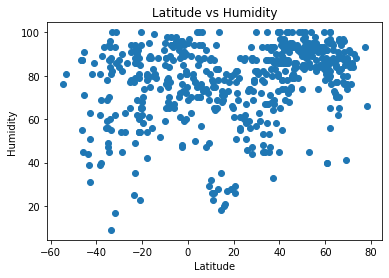

In [9]:
latitude = list(clean_df['Latitude'])
humidity = list(clean_df['Humidity'])

latvtemp = plt.scatter(latitude,humidity)
latvtemp = plt.title("Latitude vs Humidity")
latvtemp = plt.xlabel("Latitude")
latvtemp = plt.ylabel("Humidity")
plt.savefig('latitude_vs_humidity.png')

#Here we compare Humidity to Latitude. There doesn't seem to be a correlation.

## Latitude vs. Cloudiness Plot

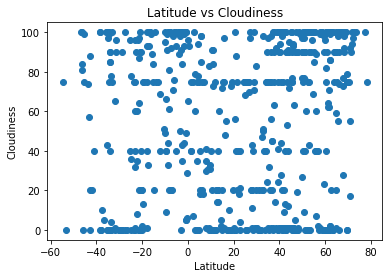

In [10]:
latitude = list(clean_df['Latitude'])
cloudiness = list(clean_df['Cloudiness'])

latvtemp = plt.scatter(latitude,cloudiness)
latvtemp = plt.title("Latitude vs Cloudiness")
latvtemp = plt.xlabel("Latitude")
latvtemp = plt.ylabel("Cloudiness")
plt.savefig('latitude_vs_cloudiness.png')

#Here is cloudiness vs latitude. Once again, doesn't seem like a correlation.

## Latitude vs. Wind Speed Plot

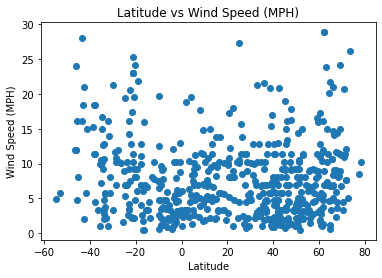

In [11]:
latitude = list(clean_df['Latitude'])
windspeed = list(clean_df['Wind Speed (MPH)'])

latvtemp = plt.scatter(latitude,windspeed)
latvtemp = plt.title("Latitude vs Wind Speed (MPH)")
latvtemp = plt.xlabel("Latitude")
latvtemp = plt.ylabel("Wind Speed (MPH)")
plt.savefig('latitude_vs_windspeed.png')

#This would be wind speed vs latitude. No signs of correlation at first glance.

## Linear Regression

In [12]:
north_df = clean_df.loc[clean_df['Latitude'] >= 0]
south_df = clean_df.loc[clean_df['Latitude'] < 0]


####  North & South Hemisphere - Max Temp vs. Latitude Linear Regression

-0.8648797052623203 0.5422155726354038


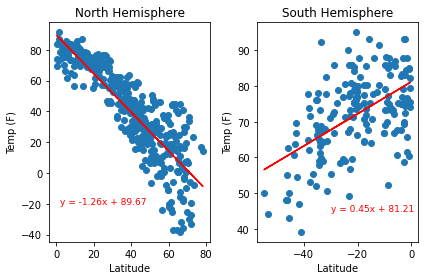

In [21]:
x1 = north_df['Latitude']
y1 = north_df['Temp (F)']

x2 = south_df['Latitude']
y2 = south_df['Temp (F)']


tempvlatnorth = plt.subplot(1, 2, 1)
tempvlatnorth = plt.scatter(x1, y1)
tempvlatnorth = plt.title('North Hemisphere')
tempvlatnorth = plt.xlabel('Latitude')
tempvlatnorth = plt.ylabel('Temp (F)')
tempvlatnorth = plt.tight_layout()

slope, intercept, rvalue1, pvalue, stderr = st.linregress(x1, y1)
regress_values = x1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
tempvlatnorth = plt.plot(x1,regress_values,"r-")
tempvlatnorth = plt.annotate(line_eq,(2,-20),fontsize=9,color="red")


tempvlatsouth = plt.subplot(1, 2, 2)
tempvlatsouth = plt.scatter(x2, y2)
tempvlatsouth = plt.title('South Hemisphere')
tempvlatsouth = plt.xlabel('Latitude')
tempvlatsouth = plt.ylabel('Temp (F)')
tempvlatsouth = plt.tight_layout()

slope, intercept, rvalue2, pvalue, stderr = st.linregress(x2, y2)
regress_values = x2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
tempvlatsouth = plt.plot(x2,regress_values,"r-")
tempvlatsouth = plt.annotate(line_eq,(-30,45),fontsize=9,color="red")

plt.savefig('north_and_south_temp_v_lat.png')

print (rvalue1,rvalue2)

# Looking at these two graphs with linear regression marked, it comfirms the earlier theory.
# There seems to be a strong cooling effect when going north (r value of .86) and a warmness when approaching 0 latitude.
# However, the south graph shows that when going away from 0 towards the south, the temp cools down again.
# Decent correlation, r value = .58

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.35008187401176494 0.25573692514253094


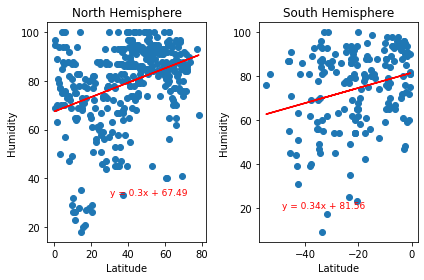

In [20]:
x1 = north_df['Latitude']
y1 = north_df['Humidity']

x2 = south_df['Latitude']
y2 = south_df['Humidity']


tempvlatnorth = plt.subplot(1, 2, 1)
tempvlatnorth = plt.scatter(x1, y1)
tempvlatnorth = plt.title('North Hemisphere')
tempvlatnorth = plt.xlabel('Latitude')
tempvlatnorth = plt.ylabel('Humidity')
tempvlatnorth = plt.tight_layout()

slope, intercept, rvalue1, pvalue, stderr = st.linregress(x1, y1)
regress_values = x1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
tempvlatnorth = plt.plot(x1,regress_values,"r-")
tempvlatnorth = plt.annotate(line_eq,(30,33),fontsize=9,color="red")


tempvlatsouth = plt.subplot(1, 2, 2)
tempvlatsouth = plt.scatter(x2, y2)
tempvlatsouth = plt.title('South Hemisphere')
tempvlatsouth = plt.xlabel('Latitude')
tempvlatsouth = plt.ylabel('Humidity')
tempvlatsouth = plt.tight_layout()

slope, intercept, rvalue2, pvalue, stderr = st.linregress(x2, y2)
regress_values = x2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
tempvlatsouth = plt.plot(x2,regress_values,"r-")
tempvlatsouth = plt.annotate(line_eq,(-49,20),fontsize=9,color="red")

plt.savefig('north_and_south_temp_v_humid.png')

print (rvalue1,rvalue2)

# We're seeing some pretty weak correlations here, probably nothing too certain. 
# If this truly had a correlation, it would say the farther north you go, the more humid it is.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.26642946652039207 0.20441370717958515


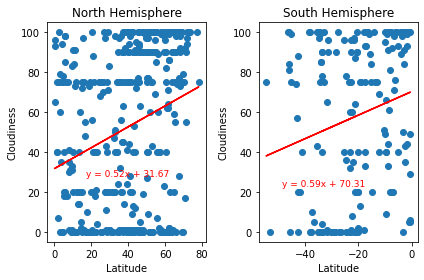

In [19]:
x1 = north_df['Latitude']
y1 = north_df['Cloudiness']

x2 = south_df['Latitude']
y2 = south_df['Cloudiness']


tempvlatnorth = plt.subplot(1, 2, 1)
tempvlatnorth = plt.scatter(x1, y1)
tempvlatnorth = plt.title('North Hemisphere')
tempvlatnorth = plt.xlabel('Latitude')
tempvlatnorth = plt.ylabel('Cloudiness')
tempvlatnorth = plt.tight_layout()

slope, intercept, rvalue1, pvalue, stderr = st.linregress(x1, y1)
regress_values = x1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
tempvlatnorth = plt.plot(x1,regress_values,"r-")
tempvlatnorth = plt.annotate(line_eq,(17,28),fontsize=9,color="red")


tempvlatsouth = plt.subplot(1, 2, 2)
tempvlatsouth = plt.scatter(x2, y2)
tempvlatsouth = plt.title('South Hemisphere')
tempvlatsouth = plt.xlabel('Latitude')
tempvlatsouth = plt.ylabel('Cloudiness')
tempvlatsouth = plt.tight_layout()

slope, intercept, rvalue2, pvalue, stderr = st.linregress(x2, y2)
regress_values = x2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
tempvlatsouth = plt.plot(x2,regress_values,"r-")
tempvlatsouth = plt.annotate(line_eq,(-49,23),fontsize=9,color="red")

plt.savefig('north_and_south_temp_v_cloud.png')

print (rvalue1,rvalue2)

# We're seeing some very weak correlations here. Nothing to draw from this.
# If there were a correlation, it would say the farther north you go, the cloudier it is.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0.11019766497385704 -0.35831825350622193


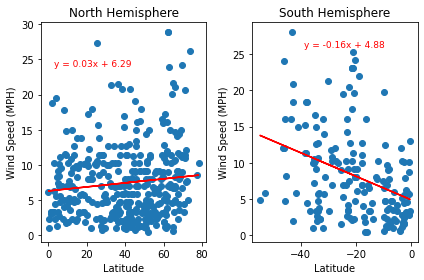

In [17]:
x1 = north_df['Latitude']
y1 = north_df['Wind Speed (MPH)']

x2 = south_df['Latitude']
y2 = south_df['Wind Speed (MPH)']


tempvlatnorth = plt.subplot(1, 2, 1)
tempvlatnorth = plt.scatter(x1, y1)
tempvlatnorth = plt.title('North Hemisphere')
tempvlatnorth = plt.xlabel('Latitude')
tempvlatnorth = plt.ylabel('Wind Speed (MPH)')
tempvlatnorth = plt.tight_layout()

slope, intercept, rvalue1, pvalue, stderr = st.linregress(x1, y1)
regress_values = x1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
tempvlatnorth = plt.plot(x1,regress_values,"r-")
tempvlatnorth = plt.annotate(line_eq,(3,24),fontsize=9,color="red")


tempvlatsouth = plt.subplot(1, 2, 2)
tempvlatsouth = plt.scatter(x2, y2)
tempvlatsouth = plt.title('South Hemisphere')
tempvlatsouth = plt.xlabel('Latitude')
tempvlatsouth = plt.ylabel('Wind Speed (MPH)')
tempvlatsouth = plt.tight_layout()

slope, intercept, rvalue2, pvalue, stderr = st.linregress(x2, y2)
regress_values = x2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
tempvlatsouth = plt.plot(x2,regress_values,"r-")
tempvlatsouth = plt.annotate(line_eq,(-39,26),fontsize=9,color="red")

plt.savefig('north_and_south_temp_v_wind.png')

print (rvalue1,rvalue2)

# We're seeing some exceptionally weak correlations here. Nothing to draw from this.
# If there were any correlation to draw from this, it says the further south you go, the windier it is.